In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('final_dataset_encoded.csv', low_memory=False)

df.set_index('academicYear', inplace=True)

# Display the DataFrame
print("DataFrame with 'academicYear' as index:")
print(df)


DataFrame with 'academicYear' as index:
                 idOSYM  scholarshipRate  quota  occupiedSlots  tuitionFee  \
academicYear                                                                 
2024          208610078            100.0      8              8         0.0   
2023          208610078            100.0      8              8         0.0   
2022          208610078            100.0     10             10         0.0   
2021          208610078            100.0     10             10         0.0   
2020          208610078            100.0     10             10         0.0   
...                 ...              ...    ...            ...         ...   
2023          110310365              0.0     60             62         0.0   
2022          110310365              0.0     60             62         0.0   
2021          110310365              0.0     60              6         0.0   
2020          110310365              0.0     62             62         0.0   
2024          110390279 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

binary_features = [
    'universityType_devlet', 'universityType_vakıf', 'programType_DİL', 'programType_EA', 
    'programType_SAY', 'programType_SÖZ', 'language_Almanca', 'language_Arapça', 'language_Bulgarca',  
    'language_Ermenice', 'language_Fransızca', 'language_Korece', 'language_Lehçe', 'language_Rusça', 
    'language_Türkçe', 'language_Çince', 'language_İngilizce', 'language_İspanyolca', 'language_İtalyanca', 
     'baseRanking' ,'idOSYM'
]
print(df[binary_features].describe().round(3))
print(len(binary_features))



       universityType_devlet  universityType_vakıf  programType_DİL  \
count              65281.000             65281.000        65281.000   
mean                   0.488                 0.512            0.044   
std                    0.500                 0.500            0.204   
min                    0.000                 0.000            0.000   
25%                    0.000                 0.000            0.000   
50%                    0.000                 1.000            0.000   
75%                    1.000                 1.000            0.000   
max                    1.000                 1.000            1.000   

       programType_EA  programType_SAY  programType_SÖZ  language_Almanca  \
count       65281.000        65281.000        65281.000         65281.000   
mean            0.342            0.449            0.165             0.005   
std             0.474            0.497            0.371             0.069   
min             0.000            0.000            0.

In [4]:

encoded_features = ['universityName_encoded', 'departmentName_encoded', 'facultyName_encoded']
print(df[encoded_features].describe().round(3))

numeric_features = []
for feature in df.columns:
    if feature not in binary_features:
        numeric_features.append(feature)
        
print(len(numeric_features))

       universityName_encoded  departmentName_encoded  facultyName_encoded
count               65281.000               65281.000            65281.000
mean               305850.414              305850.414           305850.414
std                119847.608              193250.422           162091.516
min                 23547.579                 982.000             1408.000
25%                224916.102              150905.003           151872.835
50%                302831.073              272493.733           332343.064
75%                380012.706              468733.890           387107.169
max                781135.513             1643810.000          1382501.429
40


In [5]:
skew_values = df[numeric_features].skew()

skew_features = skew_values[abs(skew_values) > 1.5].index.tolist()

print("Skewed Features:", skew_features)
print(len(skew_features))

continuous_features = [col for col in numeric_features if col not in skew_features]

print("Continous Features:", continuous_features)
print(len(continuous_features))

Skewed Features: ['quota', 'occupiedSlots', 'tuitionFee', 'profCount', 'assoCount', 'docCount', 'topRanking', 'stdDeviationStudents', 'revenue', 'totalPreference', 'top1PreferenceRatio', 'top1AdmittedRatio', 'admittedTotalPref', 'admittedTotalDepartmentPref', 'currentStudentCount', 'baseScore', 'topScore', 'totalForeignStudents']
18
Continous Features: ['scholarshipRate', 'universityLocation', 'universityRegion', 'avgAdmissionRanking(TYT)', 'baseAdmissionRanking(TYT)', 'outOfCityStudentRate', 'avgOrderofPreference', 'avgAdmittedStudentPrefOrder', 'top3AdmittedRatio', 'top10AdmittedRatio', 'totalStudentNumber', 'Urap_Rank', 'Urap_Score', 'avg_monthly_income_group', 'Time_for_employment', 'employment_rate', 'base_salary_by_year', 'inflation_by_year', 'growth_by_year', 'universityName_encoded', 'departmentName_encoded', 'facultyName_encoded']
22


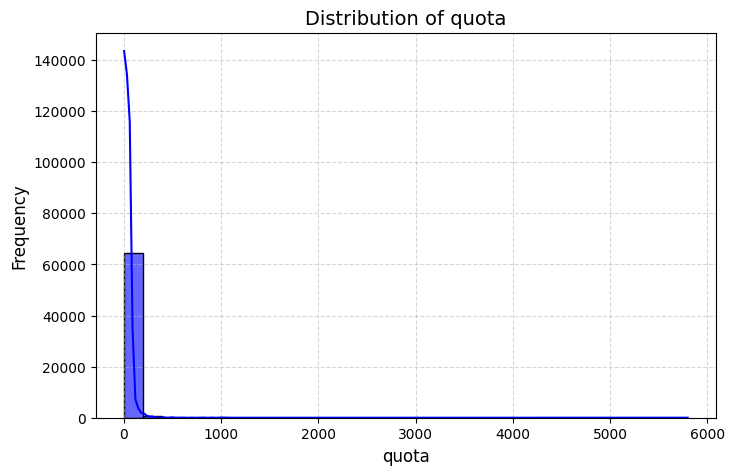

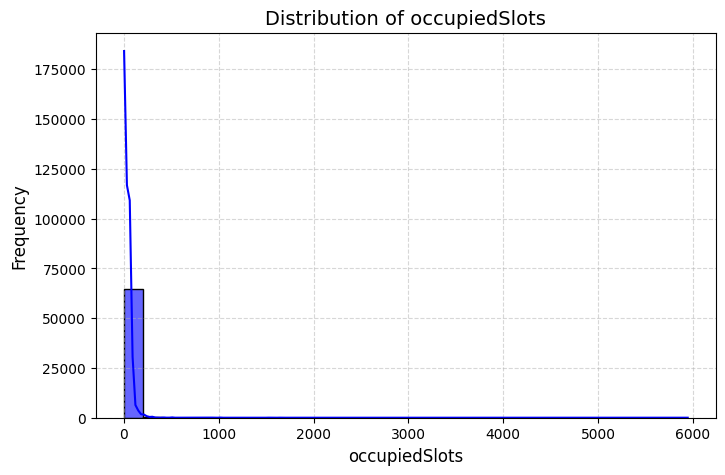

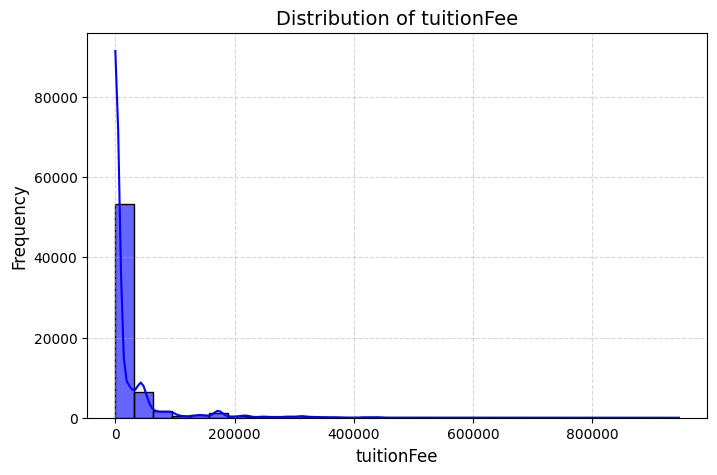

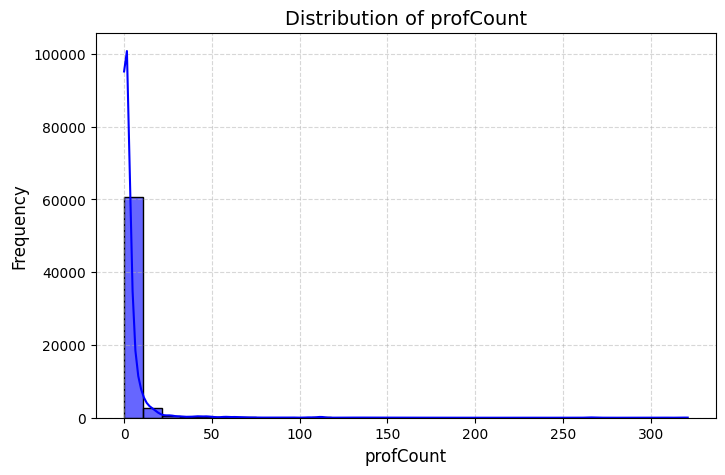

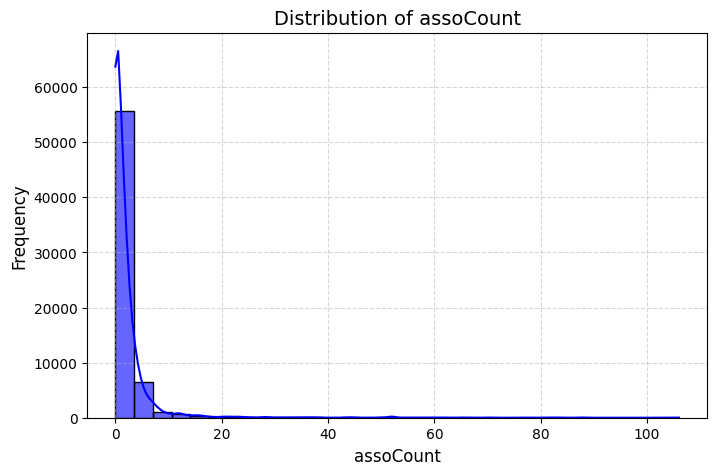

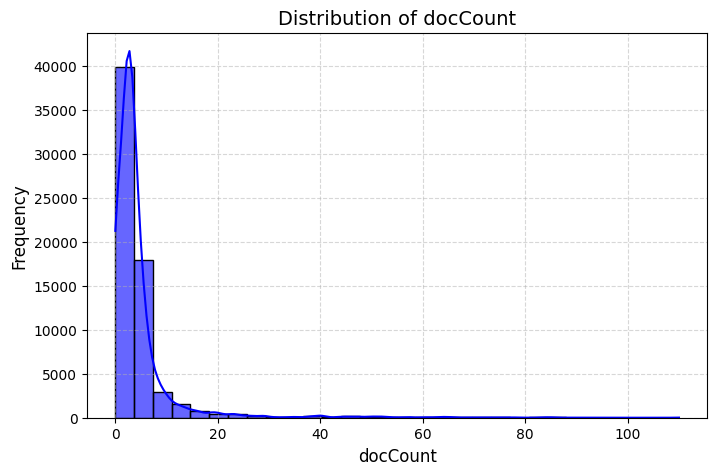

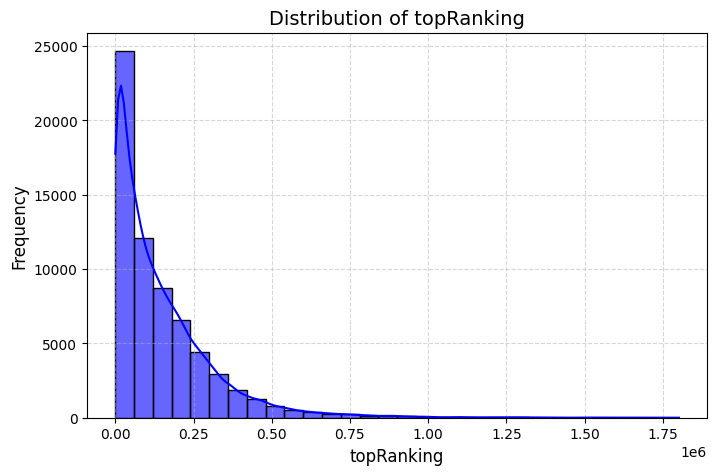

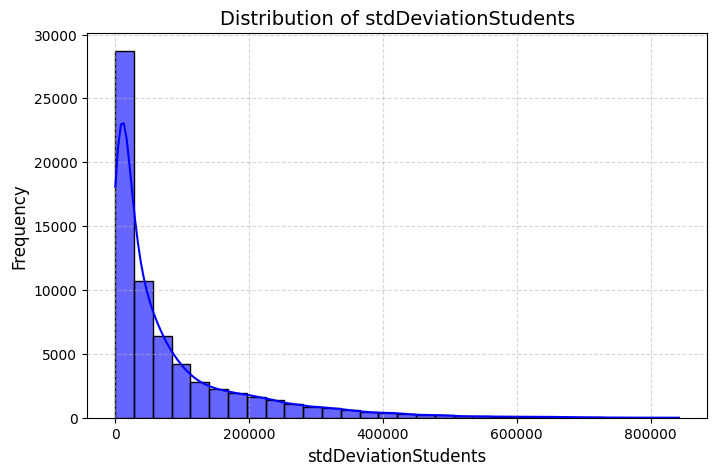

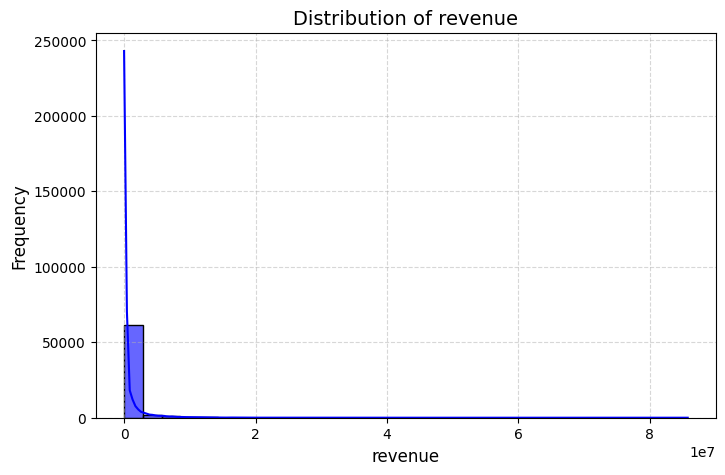

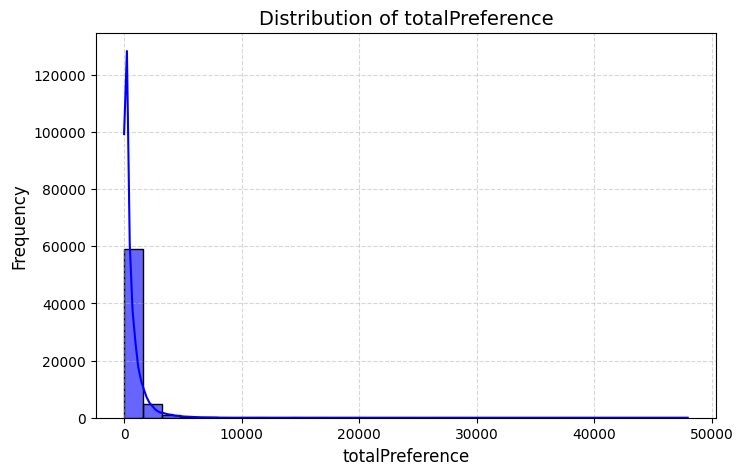

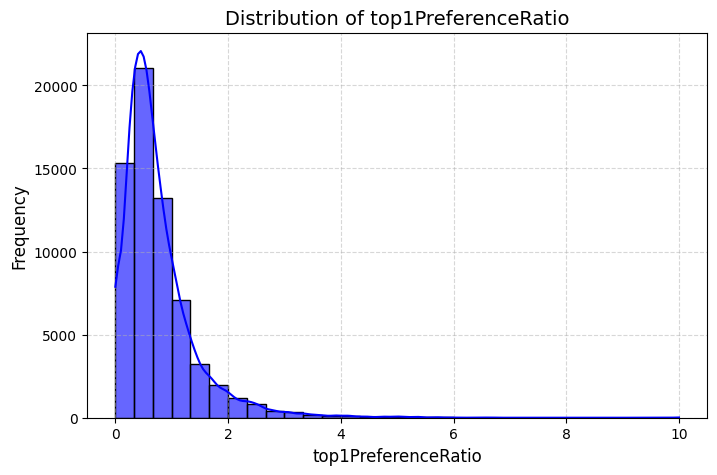

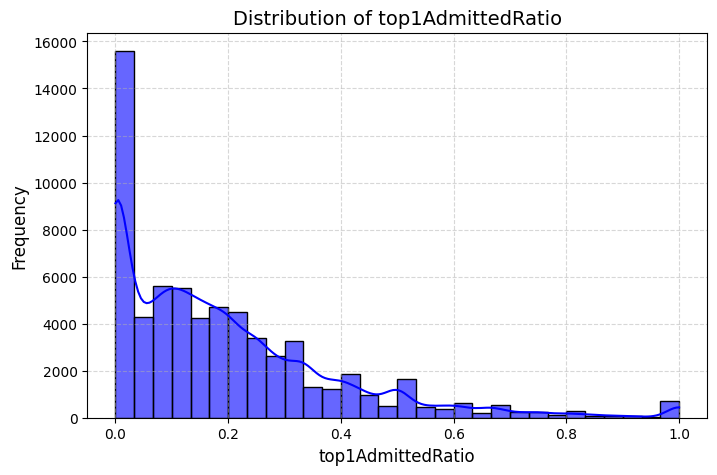

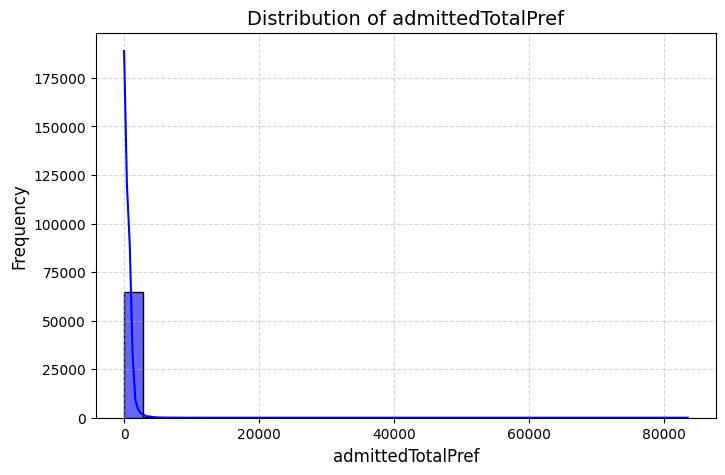

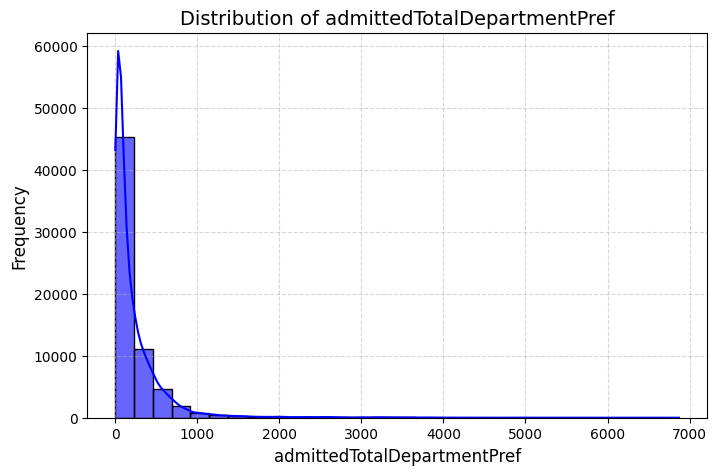

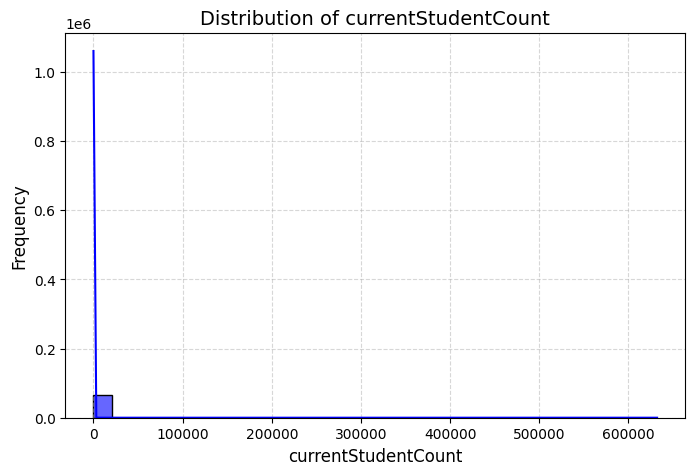

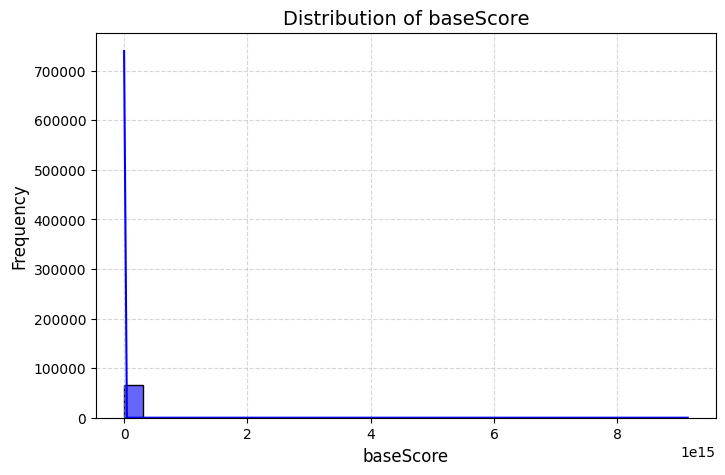

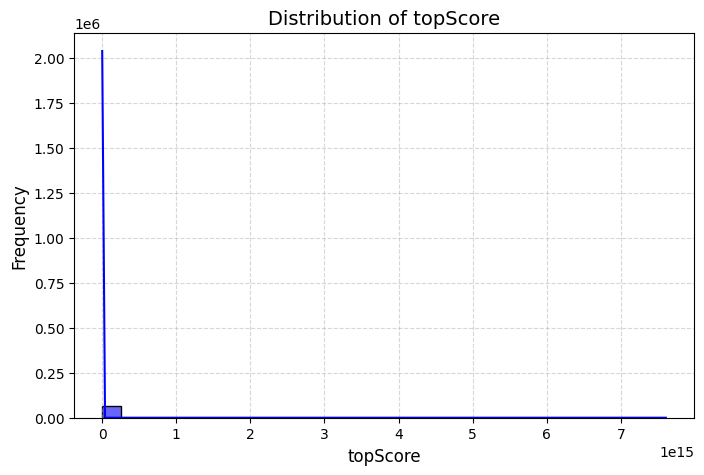

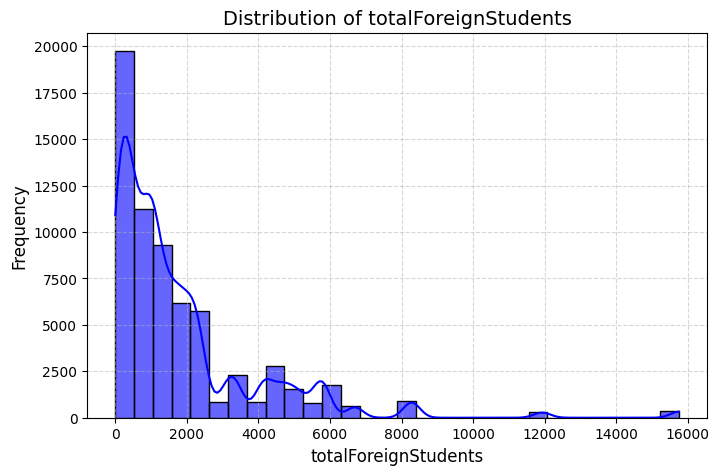

In [6]:
def plot_skewed_features(df, features):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[feature], kde=True, bins=30, color='blue', alpha=0.6)
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

plot_skewed_features(df, skew_features)

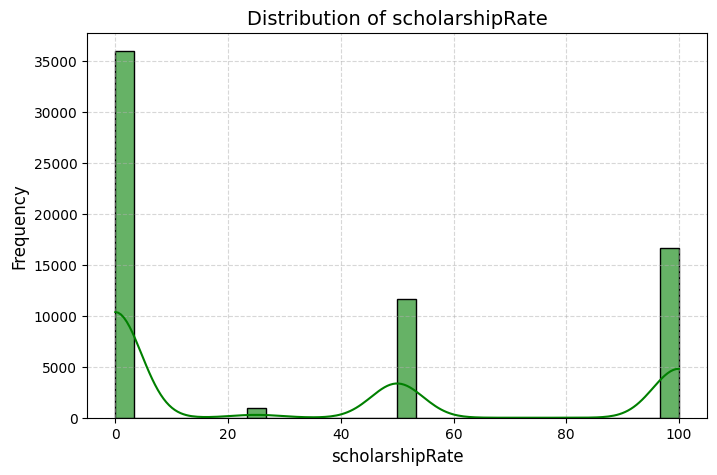

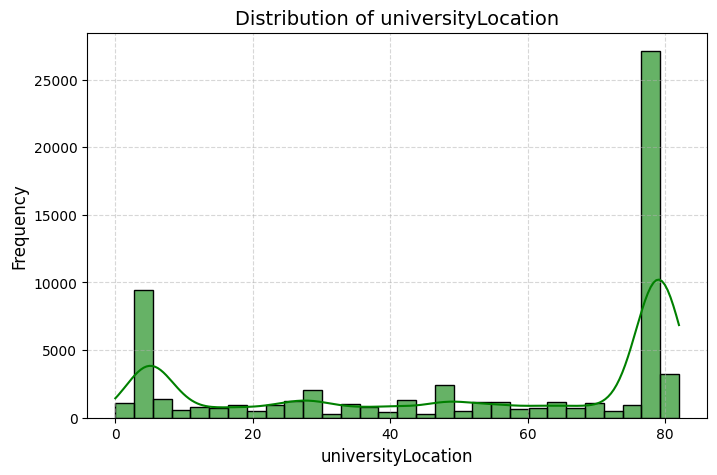

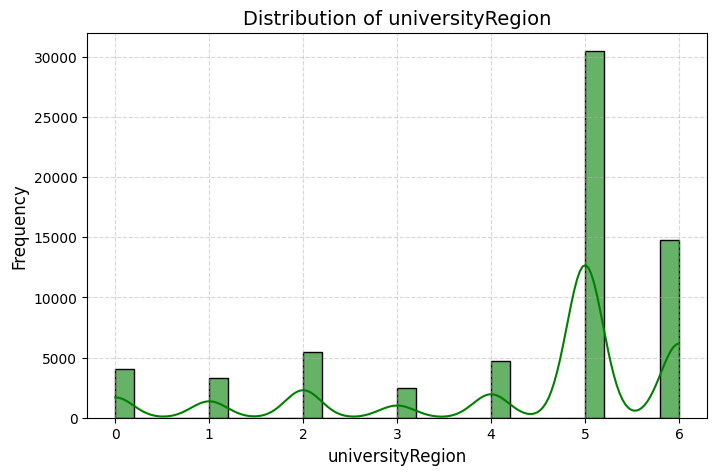

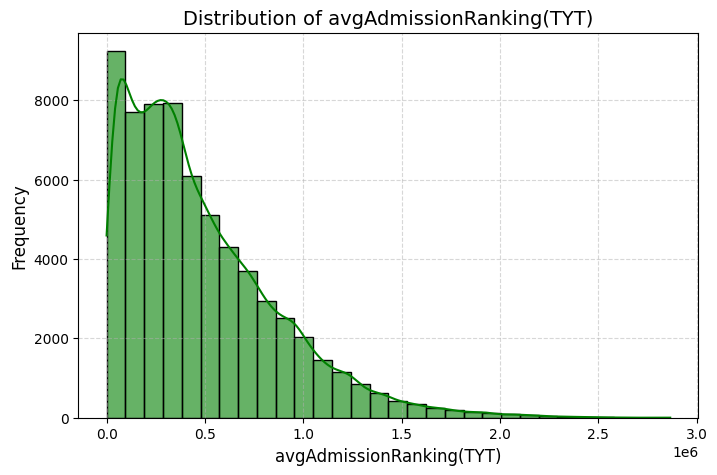

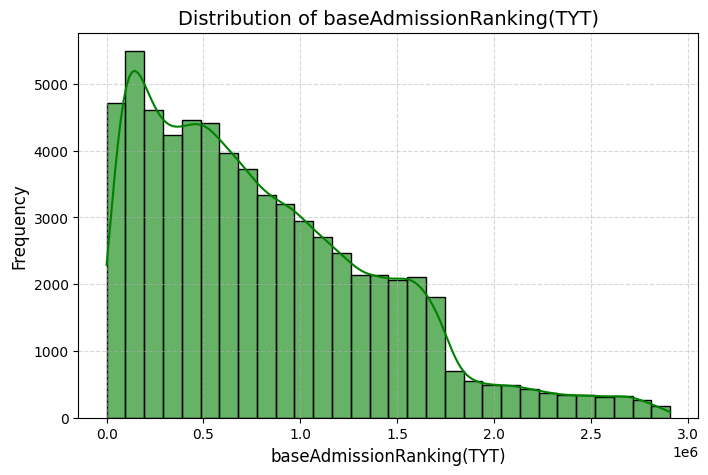

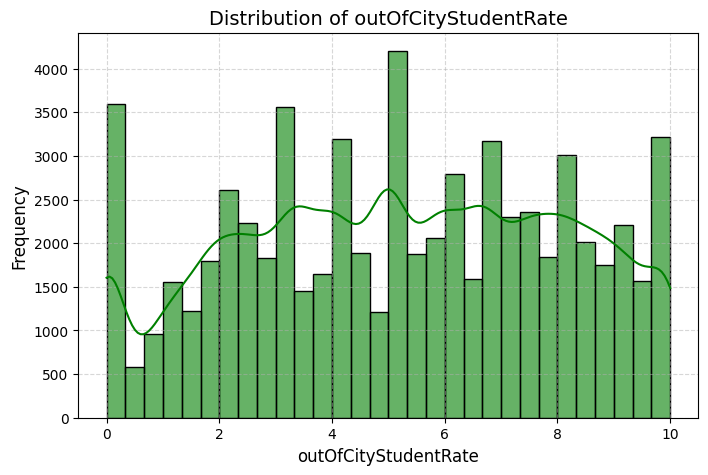

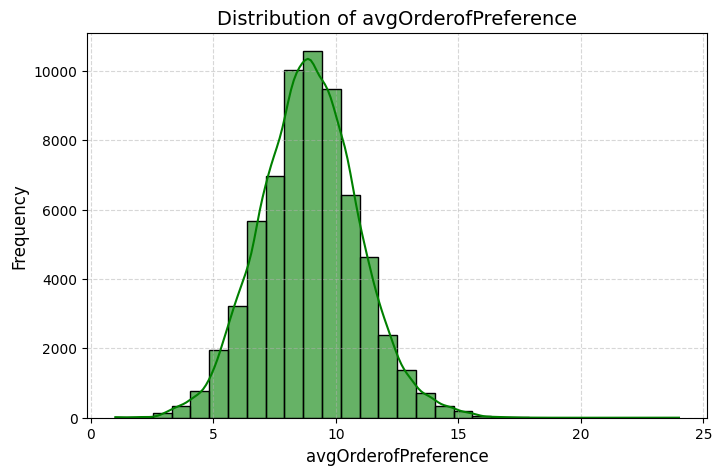

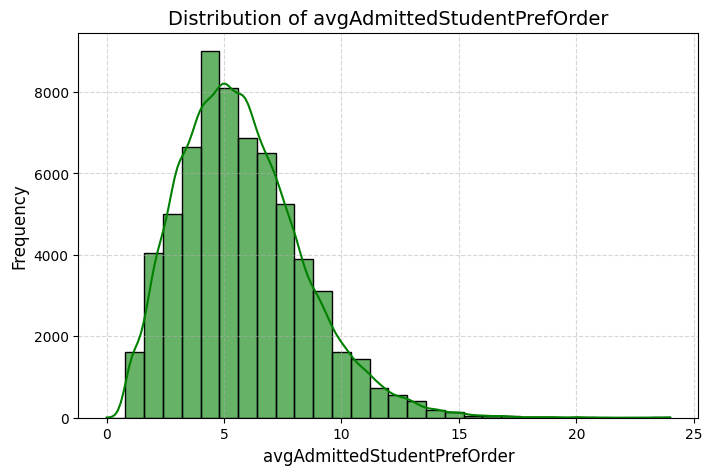

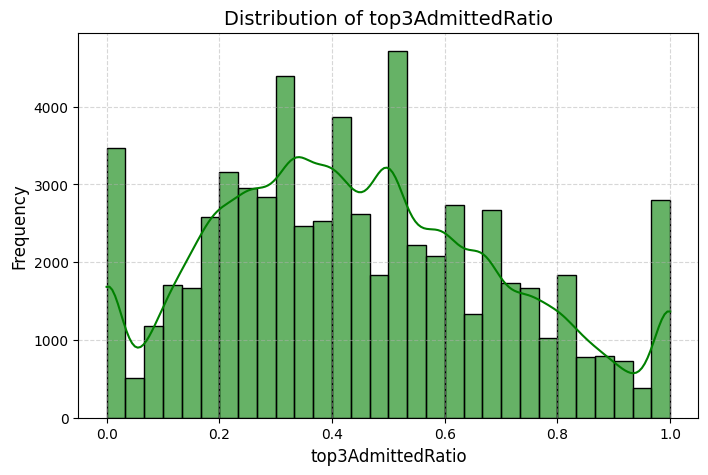

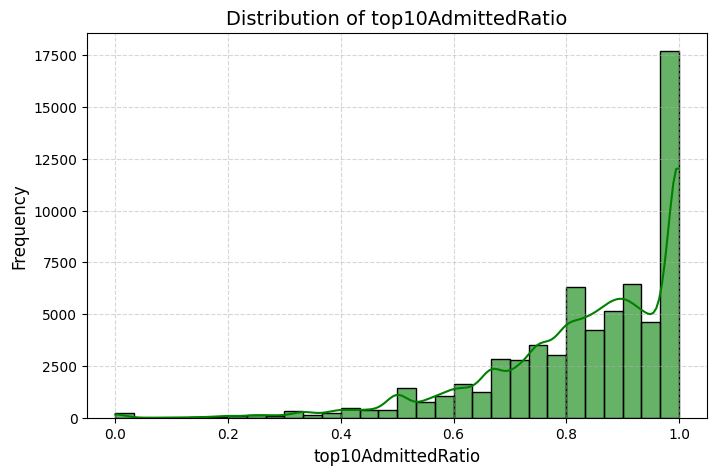

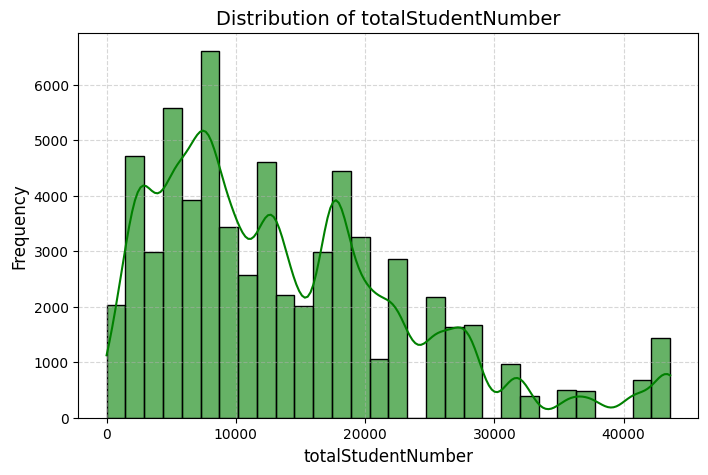

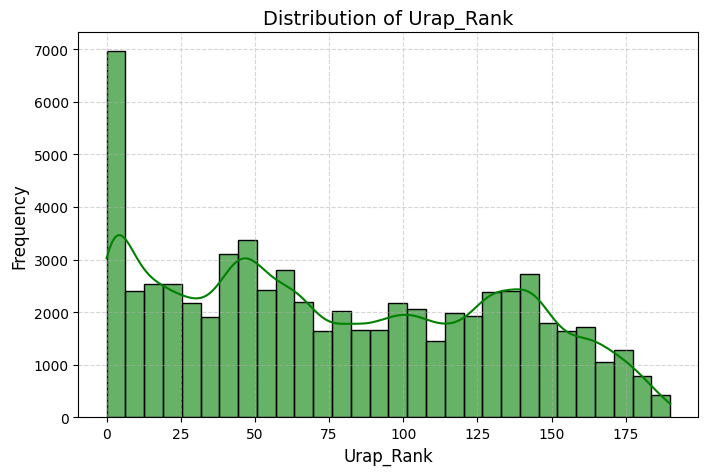

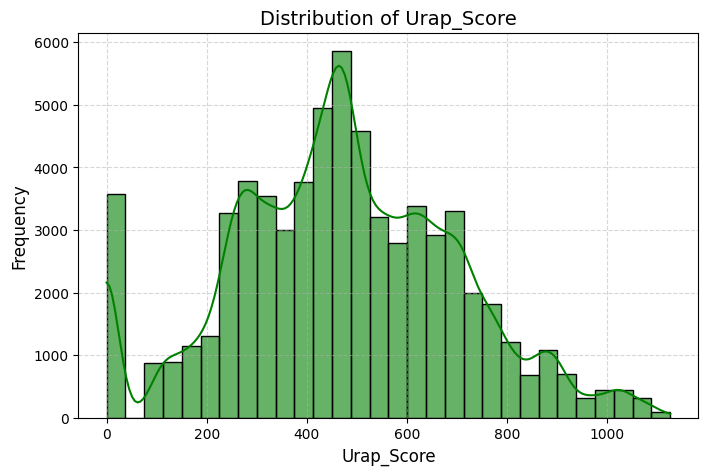

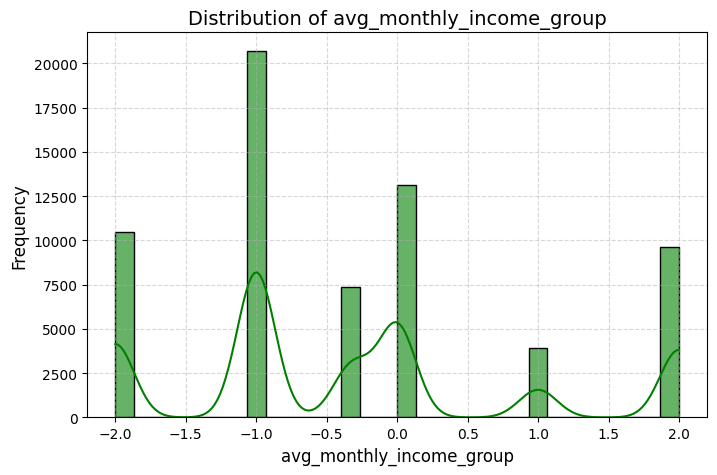

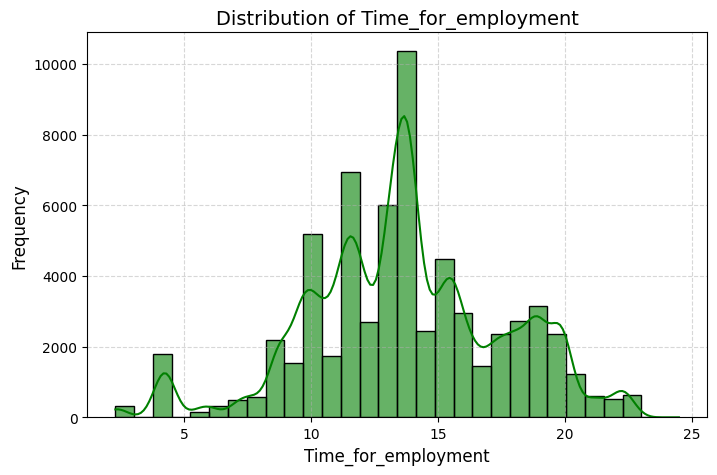

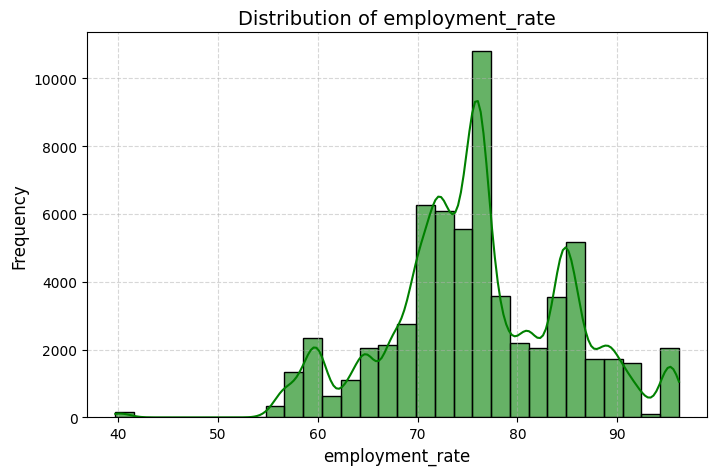

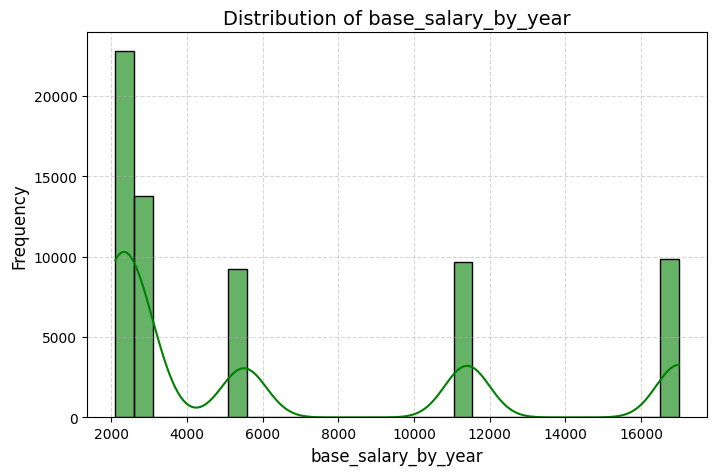

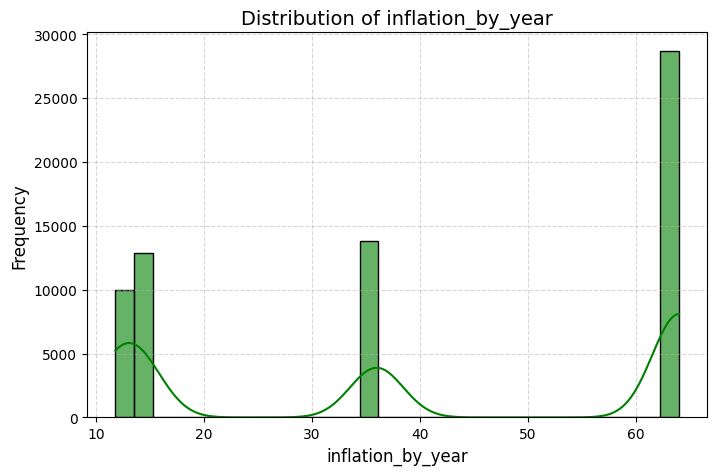

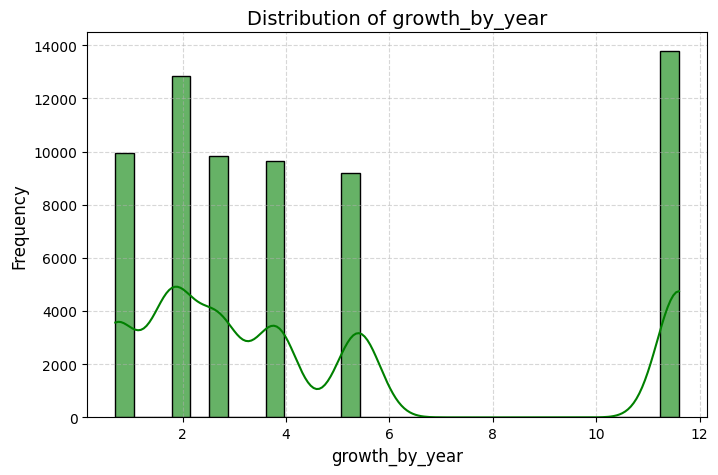

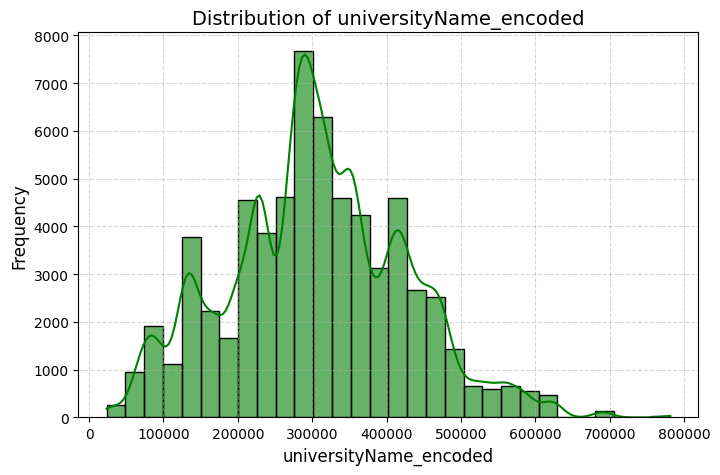

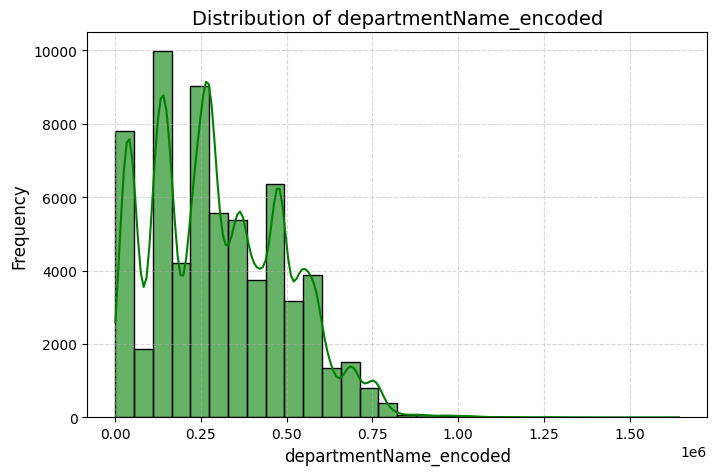

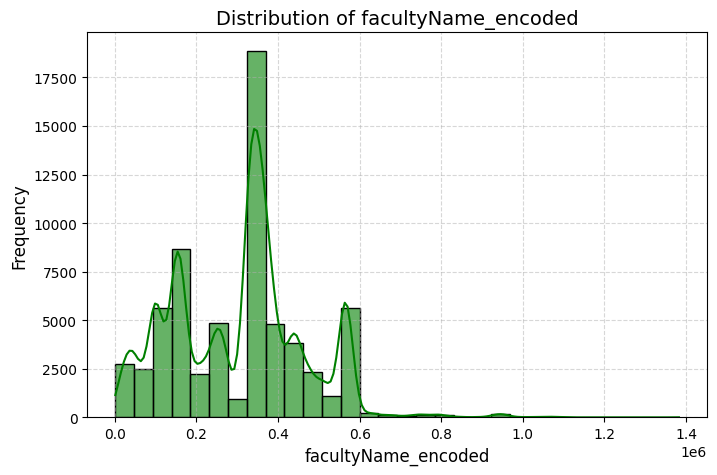

In [7]:
def plot_continuous_features(df, features):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[feature], kde=True, bins=30, color='green', alpha=0.6)
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

plot_continuous_features(df, continuous_features)

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


# Define transformations
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        # Numerical features (standard scaling)
        ('num', scaler_minmax, continuous_features),
        
        # Skewed features (log transformation + standard scaling)
        ('skewed', Pipeline(steps=[
            ('log', FunctionTransformer(np.log1p, validate=True)),
            ('scaler', scaler_minmax)
        ]), skew_features),
    ]
)

# Add a small constant to skewed features to avoid -inf values
df[skew_features] = df[skew_features] + 0.1

processed_data = preprocessor.fit_transform(df)

processed_df = pd.DataFrame(processed_data, columns=continuous_features + skew_features)

print(processed_df[numeric_features].describe().round(3))



       scholarshipRate      quota  occupiedSlots  tuitionFee  \
count        65281.000  65281.000      65281.000   65281.000   
mean             0.348      0.322          0.304       0.205   
std              0.424      0.128          0.137       0.348   
min              0.000      0.000          0.000       0.000   
25%              0.000      0.210          0.184       0.000   
50%              0.000      0.344          0.335       0.000   
75%              1.000      0.425          0.424       0.699   
max              1.000      1.000          1.000       1.000   

       universityLocation  universityRegion  profCount  assoCount   docCount  \
count           65281.000         65281.000  65281.000  65281.000  65281.000   
mean                0.642             0.719      0.160      0.155      0.279   
std                 0.367             0.293      0.163      0.163      0.165   
min                 0.000             0.000      0.000      0.000      0.000   
25%                 0.2

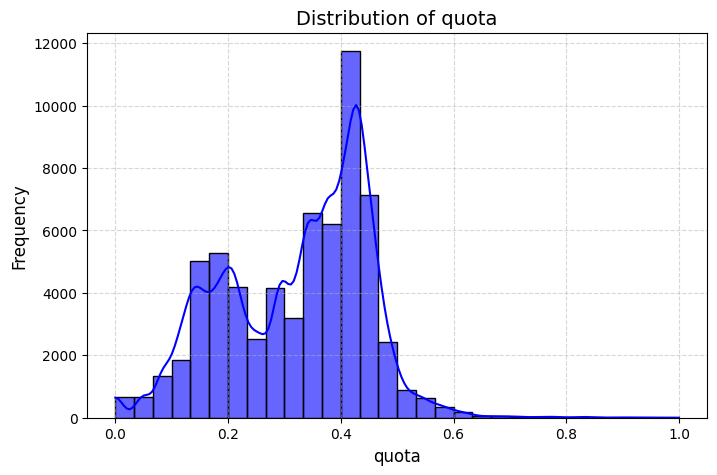

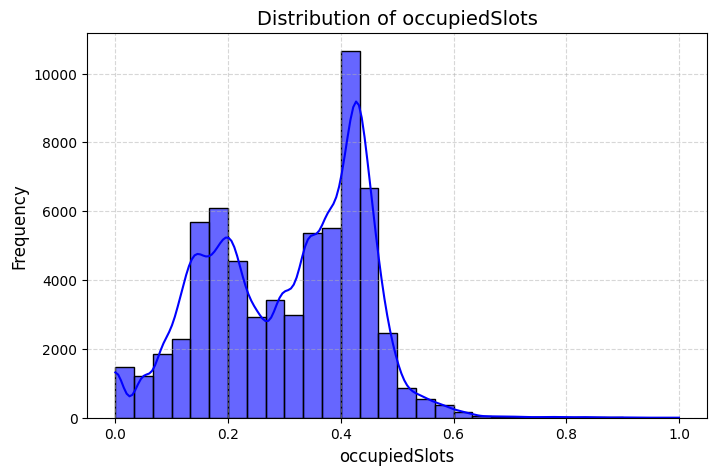

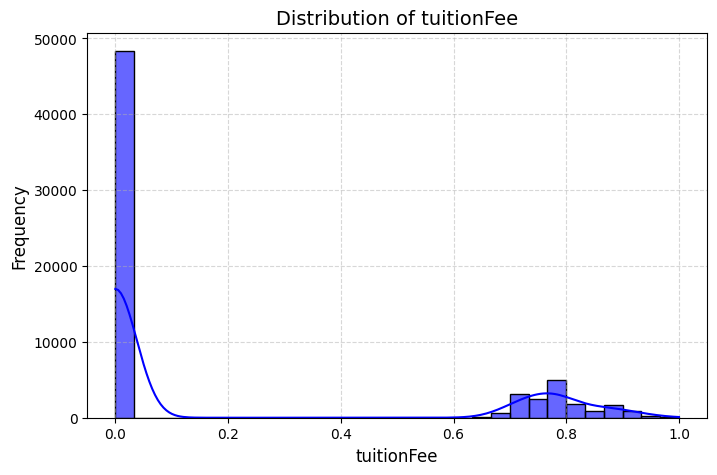

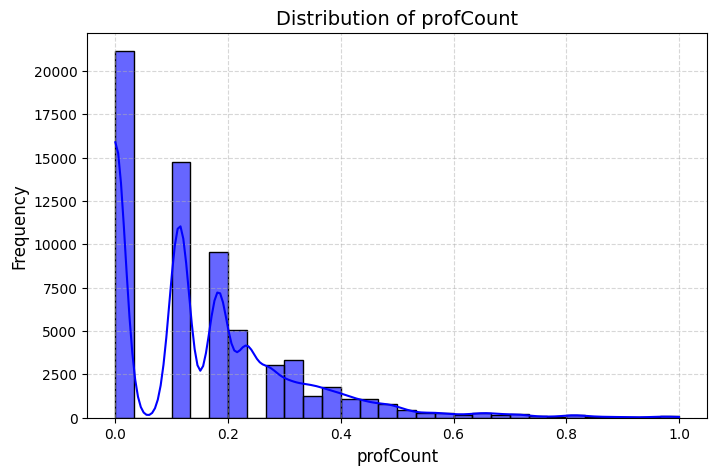

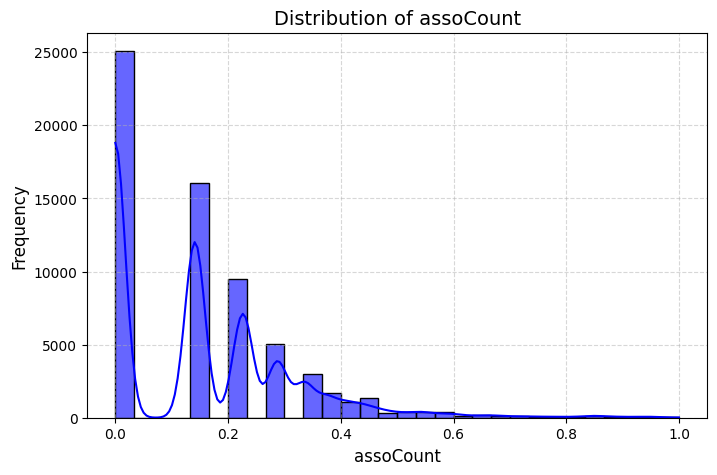

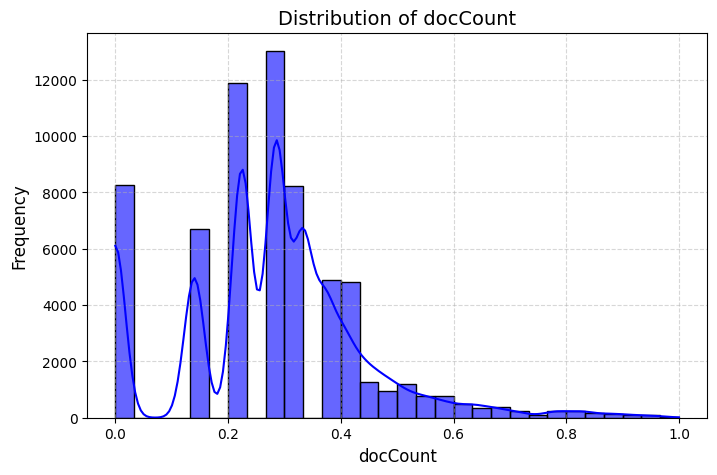

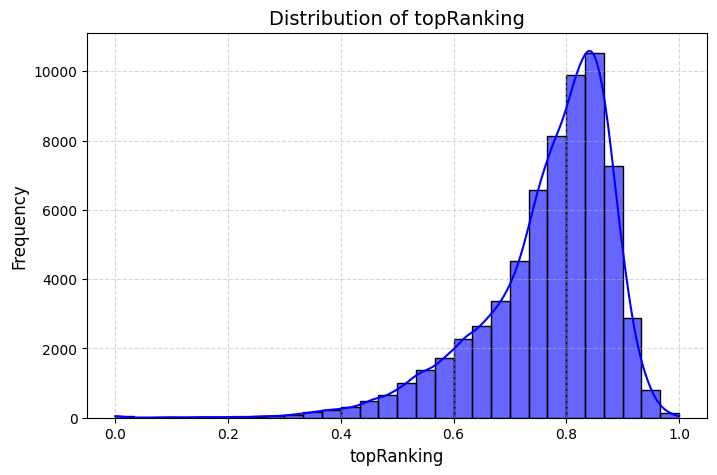

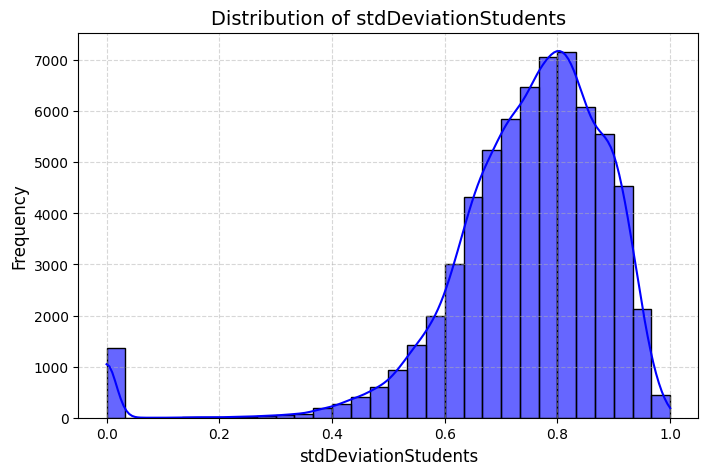

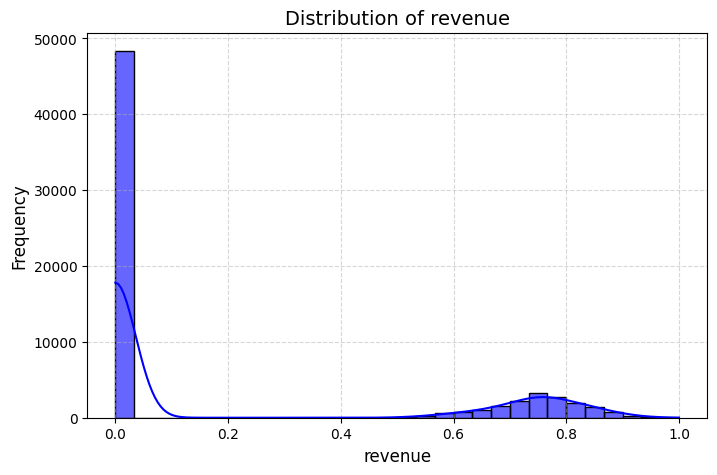

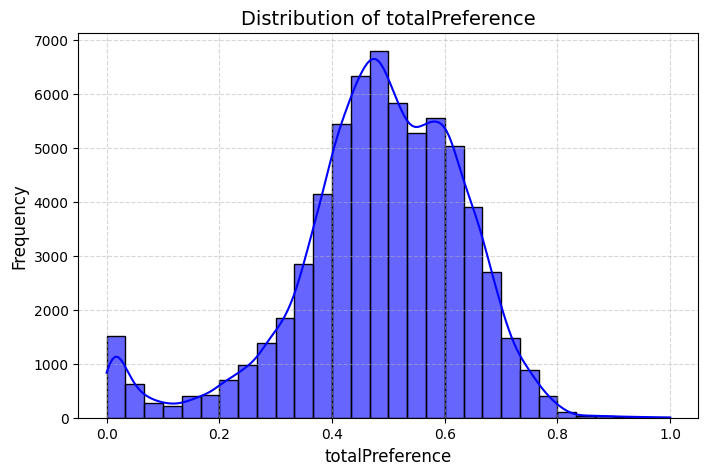

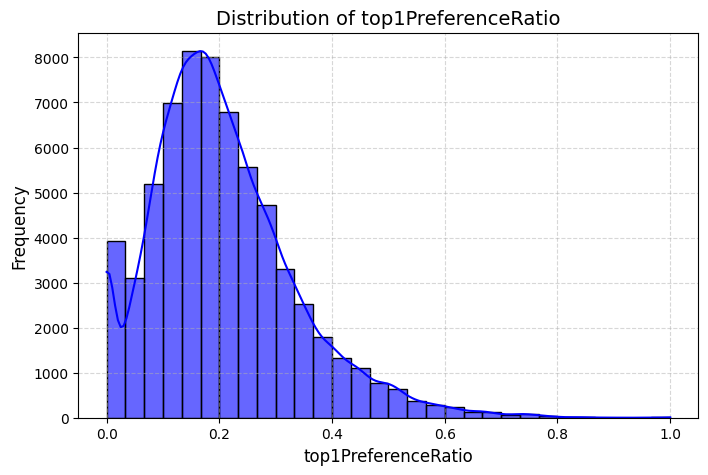

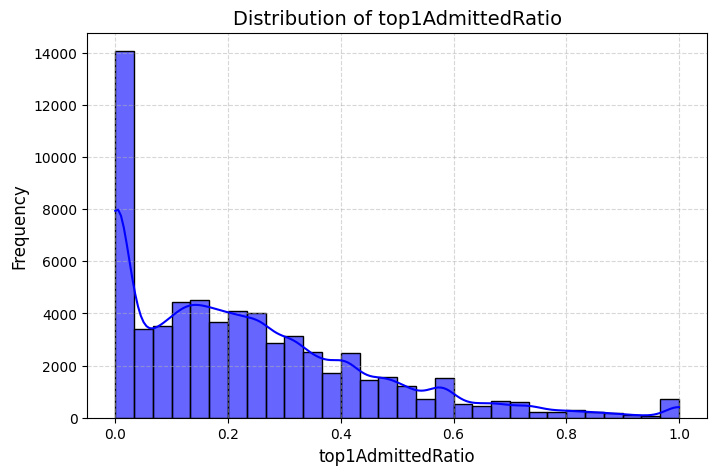

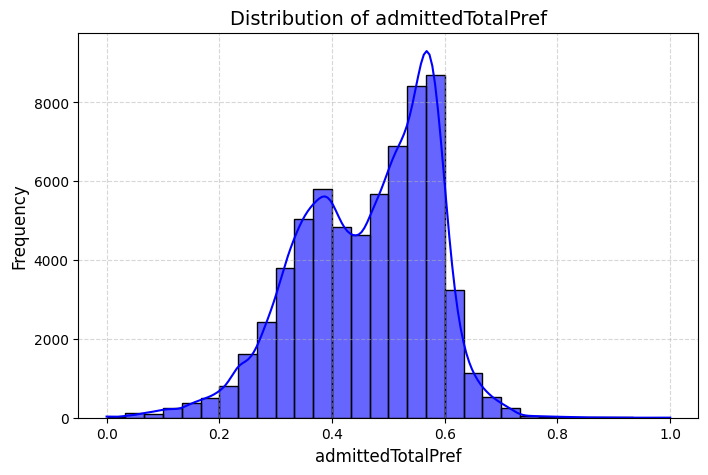

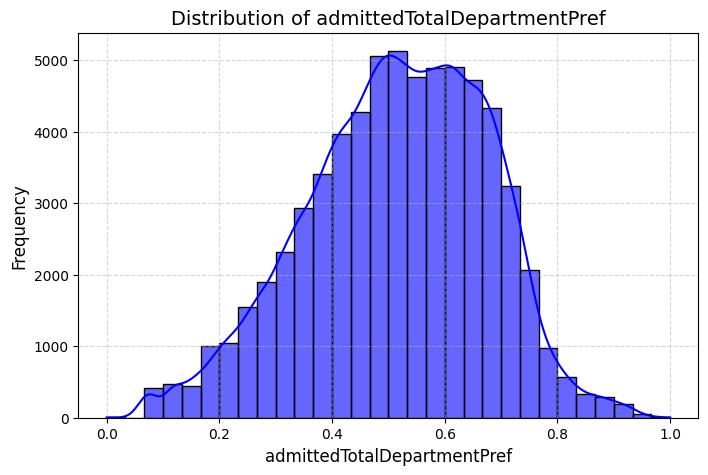

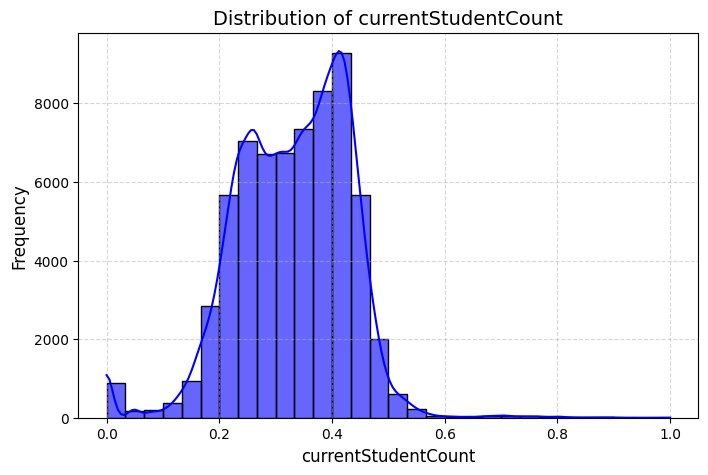

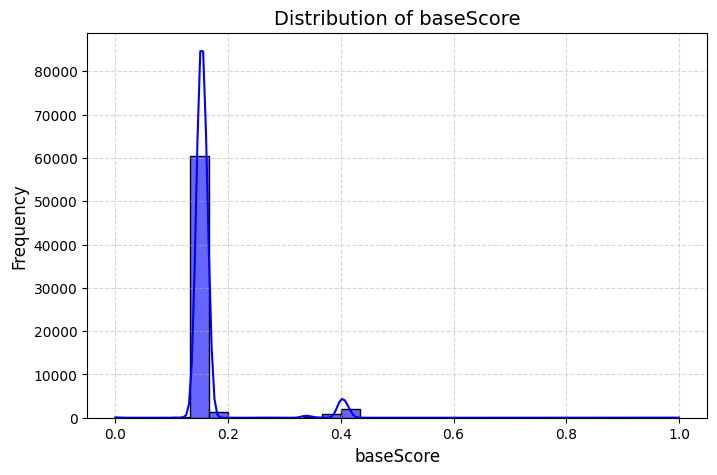

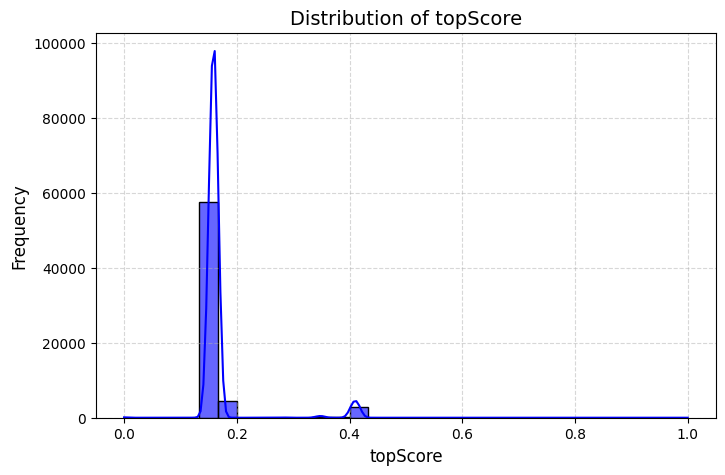

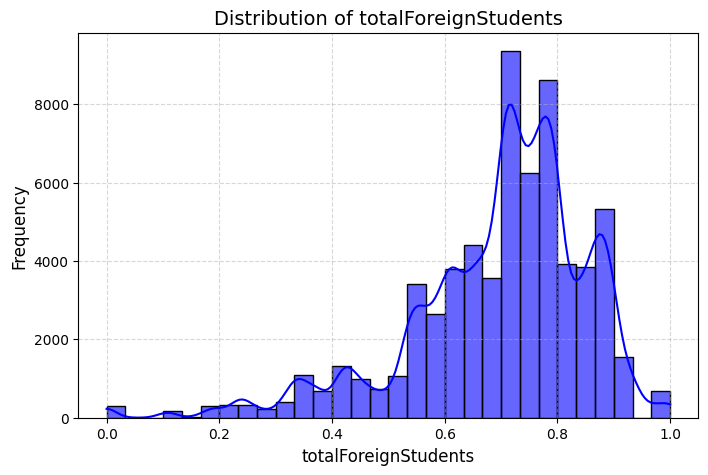

In [9]:
plot_skewed_features(processed_df, skew_features)

In [26]:
df_2019 = df.loc[2019]
df_2020 = df.loc[2020]

# Find common unique identifiers
common_ids = set(df_2019['idOSYM']).intersection(set(df_2020['idOSYM']))
print("Number of 2019 IDs:", df_2019.shape)
print("Number of 2020 IDs:", df_2020.shape)
print("Number of common IDs:", len(common_ids))


Number of 2019 IDs: (9942, 61)
Number of 2020 IDs: (12849, 61)
Number of common IDs: 6405


In [25]:
df_2019_x = df_2019[df_2019['idOSYM'].isin(common_ids)]
df_2020_y = df_2020[df_2020['idOSYM'].isin(common_ids)]

print("Number of 2019 IDs:", df_2019_x.shape)
print("Number of 2020 IDs:", df_2020_y.shape)

# X = df_2019.drop(columns=['idOSYM'])
# y = df_2020['baseRanking']

# # Check for missing values
# print("Missing values in X:", X.isnull().sum())
# print("Missing values in y:", y.isnull().sum())

# # Display shapes of X and y
# print("Shape of X:", X.shape)
# print("Shape of y:", y.shape)

Number of 2019 IDs: (9904, 61)
Number of 2020 IDs: (10335, 61)


In [12]:

# Split data by academic year
df_2021 = df.loc[2021]
df_2022 = df.loc[2022]

# Filter rows based on common IDs
common_ids = set(df_2021['idOSYM']).intersection(set(df_2022['idOSYM']))

df_2021_filtered = df_2021[df_2021['idOSYM'].isin(common_ids)]
df_2022_filtered = df_2022[df_2022['idOSYM'].isin(common_ids)]

# Prepare X and y
X = df_2021_filtered.drop(columns=[ 'idOSYM'])
y = df_2022_filtered['baseRanking']

# Check for missing values
print("Missing values in X:", X.isnull().sum())
print("Missing values in y:", y.isnull().sum())

# Display shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Missing values in X: 0
Missing values in y: 0
Shape of X: (8632, 65)
Shape of y: (8632,)


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to plot predictions vs. actual values
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Predictions vs. Actual Values ({model_name})')
    plt.grid(True)
    plt.show()

# Function to plot residuals
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot ({model_name})')
    plt.grid(True)
    plt.show()

# Function to plot model performance metrics
def plot_model_performance(y_true, y_preds, model_names):
    metrics = {'Model': [], 'RMSE': [], 'MAE': [], 'R2': []}
    for y_pred, model_name in zip(y_preds, model_names):
        metrics['Model'].append(model_name)
        metrics['RMSE'].append(np.sqrt(mean_squared_error(y_true, y_pred)))
        metrics['MAE'].append(mean_absolute_error(y_true, y_pred))
        metrics['R2'].append(r2_score(y_true, y_pred))
    
    metrics_df = pd.DataFrame(metrics)
    metrics_df.set_index('Model', inplace=True)
    
    metrics_df.plot(kind='bar', figsize=(12, 8))
    plt.title('Model Performance Metrics')
    plt.ylabel('Score')
    plt.grid(True)
    plt.show()

# Function to plot line plot of predictions
def plot_predictions_line(y_true, y_preds, model_names):
    plt.figure(figsize=(12, 8))
    plt.plot(y_true, label='Actual Values', linestyle='--', marker='o')
    for y_pred, model_name in zip(y_preds, model_names):
        plt.plot(y_pred, label=f'Predicted Values ({model_name})', linestyle='--', marker='o')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Predictions Line Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

# # Example usage
# plot_predictions(y_true, y_pred_model1, 'Model 1')
# plot_residuals(y_true, y_pred_model1, 'Model 1')
# plot_model_performance(y_true, [y_pred_model1, y_pred_model2], ['Model 1', 'Model 2'])
# plot_predictions_line(y_true, [y_pred_model1, y_pred_model2], ['Model 1', 'Model 2'])

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
import numpy as np

# Define pipelines for different regression models
def build_pipeline_random_forest():
    pipeline = Pipeline([
        ('model', RandomForestRegressor(random_state=42))
    ])
    return pipeline

def build_pipeline_linear():
    pipeline = Pipeline([
        ('model', LinearRegression())
    ])
    return pipeline

def build_pipeline_ridge():
    pipeline = Pipeline([
        ('model', Ridge())
    ])
    return pipeline

def build_pipeline_lasso():
    pipeline = Pipeline([
        ('model', Lasso())
    ])
    return pipeline

def build_pipeline_svr():
    pipeline = Pipeline([
        ('model', SVR())
    ])
    return pipeline

def build_pipeline_gradient_boosting():
    pipeline = Pipeline([
        ('model', GradientBoostingRegressor(random_state=42))
    ])
    return pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
def tune_hyperparameters_random_forest(pipeline, X_train, y_train):
    param_distributions = {
        'model__n_estimators': [100, 200, 300, 400, 500],
        'model__max_depth': [10, 20, 30, 40, 50],
        'model__min_samples_split': [2, 5, 10, 15, 20]
    }
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        n_iter=50,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_, random_search.best_params_

def tune_hyperparameters_ridge(pipeline, X_train, y_train):
    param_distributions = {
        'model__alpha': np.logspace(-4, 4, 50)
    }
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        n_iter=50,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_, random_search.best_params_

def tune_hyperparameters_lasso(pipeline, X_train, y_train):
    param_distributions = {
        'model__alpha': np.logspace(-4, 4, 50)
    }
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        n_iter=50,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_, random_search.best_params_

def tune_hyperparameters_svr(pipeline, X_train, y_train):
    param_distributions = {
        'model__C': np.logspace(-3, 3, 50),
        'model__epsilon': np.logspace(-3, 3, 50),
        'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        n_iter=50,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_, random_search.best_params_

def tune_hyperparameters_gradient_boosting(pipeline, X_train, y_train):
    param_distributions = {
        'model__n_estimators': [100, 200, 300, 400, 500],
        'model__learning_rate': np.logspace(-3, 0, 50),
        'model__max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
    }
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        n_iter=50,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_, random_search.best_params_

# Example usage
# Assuming you have X_train, y_train data
# pipeline_rf = build_pipeline_random_forest()
# best_estimator_rf, best_params_rf = tune_hyperparameters_random_forest(pipeline_rf, X_train, y_train)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model Metrics:\nRMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")
    return y_pred


In [16]:
from sklearn.model_selection import train_test_split

X_train_2021, X_test_2021, y_train_2022, y_test_2022 = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
# Build and fine-tune the Regression model
pipeline_ridge = build_pipeline_ridge()
best_estimator_ridge, best_params_ridge = tune_hyperparameters_ridge(pipeline_ridge, X_train_2021, y_train_2022)
y_pred_ridge = evaluate_model(best_estimator_ridge, X_test_2021, y_test_2022)


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.01469e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.05689e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.45594e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matri

Model Metrics:
RMSE: 146.0262, MAE: 88.4708, R^2: 0.6382


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


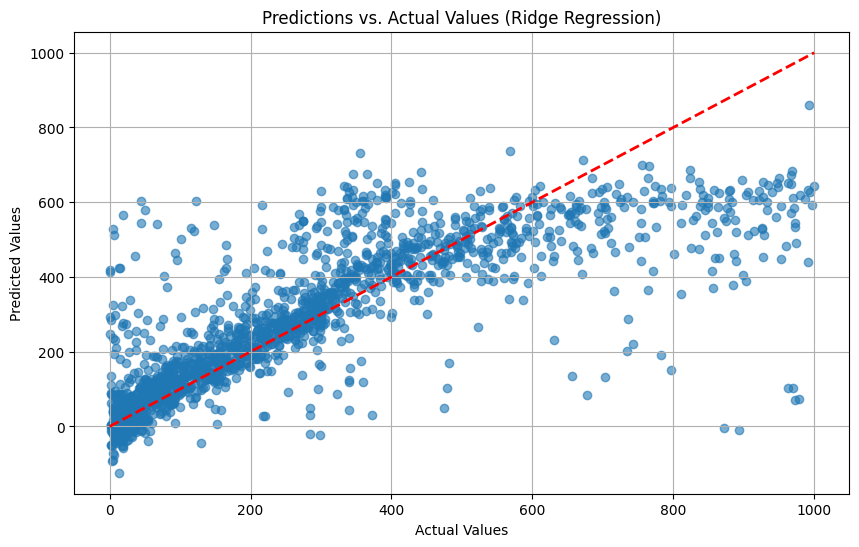

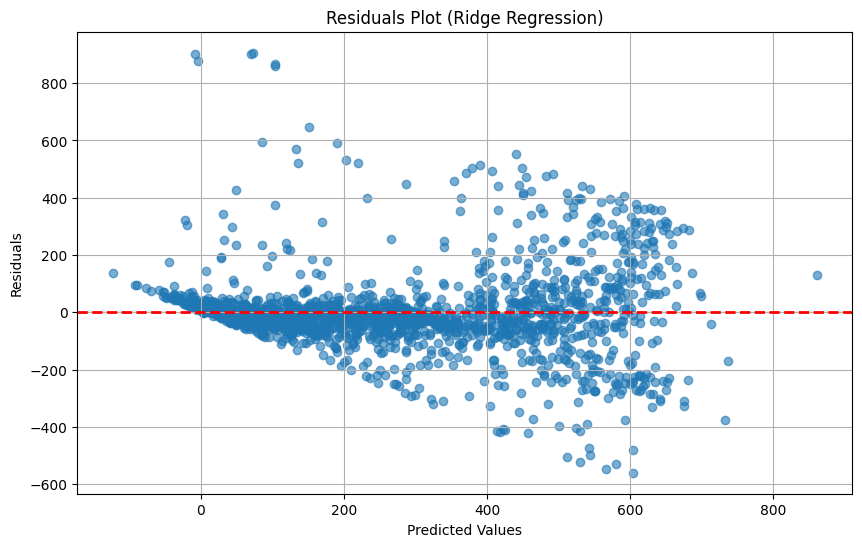

In [24]:
plot_predictions(y_test_2022, y_pred_ridge, 'Ridge Regression')
plot_residuals(y_test_2022, y_pred_ridge, 'Ridge Regression')

In [27]:


random_forest_pipeline = build_pipeline_random_forest()
random_forest_pipeline, random_forest_params = tune_hyperparameters_random_forest(random_forest_pipeline, X_train_2021, y_train_2022)
random_forest_model = random_forest_pipeline.fit(X_train_2021, y_train_2022)

y_pred_2022 = evaluate_model(random_forest_model, X_test_2021, y_test_2022)

Model Metrics:
RMSE: 130.2868, MAE: 70.0795, R^2: 0.7120


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


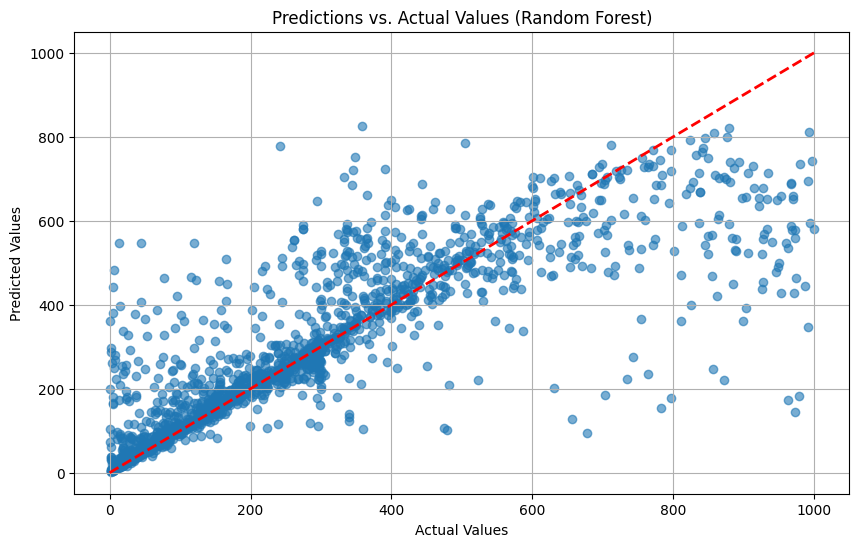

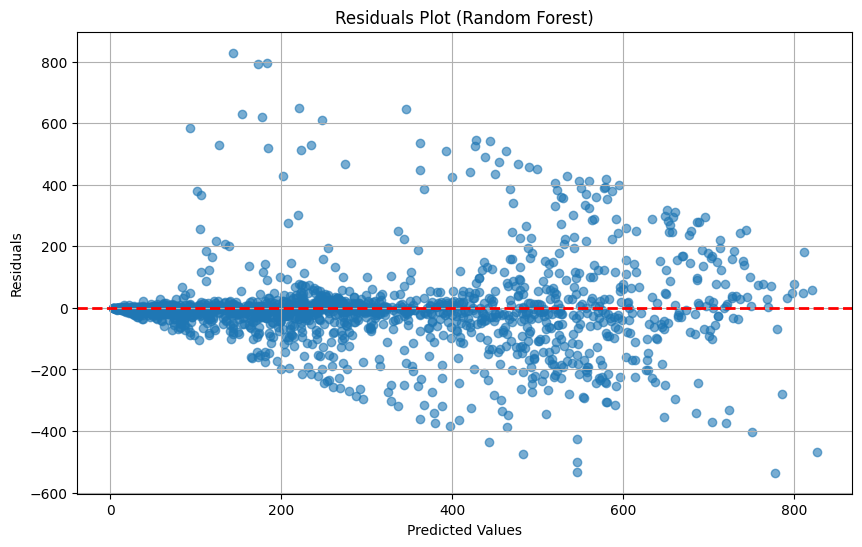

In [28]:
plot_predictions(y_test_2022, y_pred_2022, 'Random Forest')
plot_residuals(y_test_2022, y_pred_2022, 'Random Forest')

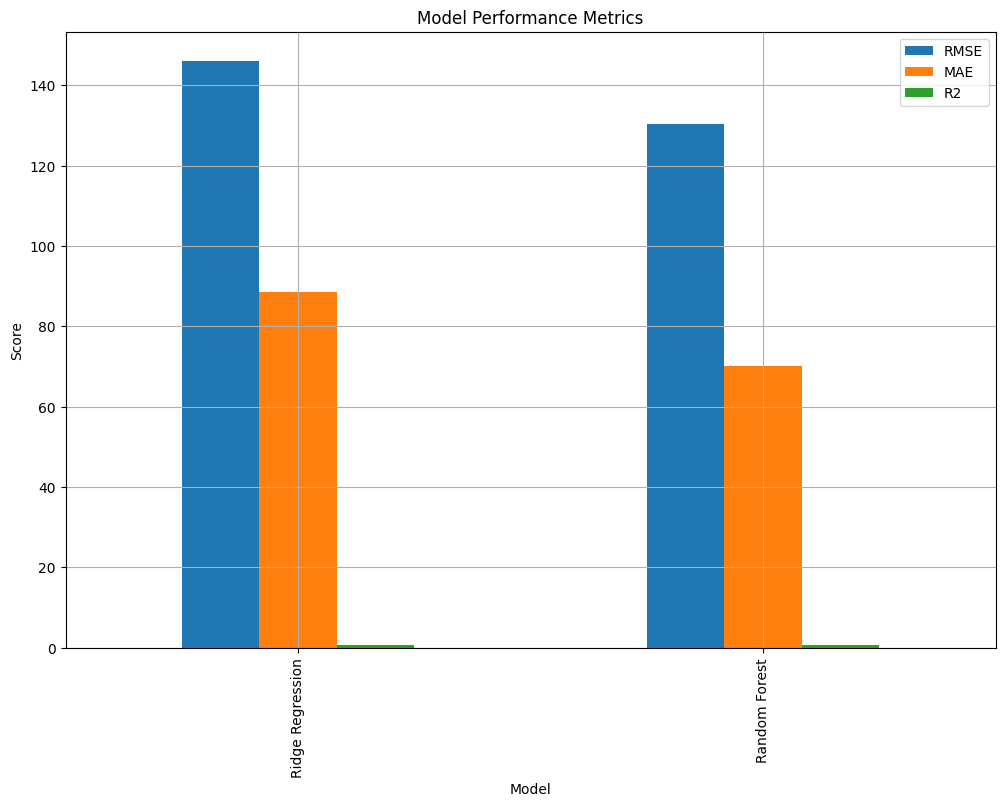

In [31]:
plot_model_performance(y_test_2022, [y_pred_ridge, y_pred_2022], ['Ridge Regression', 'Random Forest'])

In [33]:
gradient_boosting_pipeline = build_pipeline_gradient_boosting()
gradient_boosting_pipeline, gradient_boosting_params = tune_hyperparameters_gradient_boosting(gradient_boosting_pipeline, X_train_2021, y_train_2022)
y_pred_gradient_boosting = evaluate_model(gradient_boosting_pipeline, X_test_2021, y_test_2022)

Model Metrics:
RMSE: 124.6197, MAE: 67.0093, R^2: 0.7365


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
plot_predictions(y_test_2022, y_pred_gradient_boosting, 'Gradient Boosting')
plot_residuals(y_test_2022, y_pred_gradient_boosting, 'Gradient Boosting')